# Applied Pandas Example

## Pandas is used for working with datasets and is particularly useful for analyzing, cleaning, and manipulating datasets.

## 

### Plotting heating degree days (HDD) and cooling degree days (CDD) for Dekalb, IL over time

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Read into Dataframe Annual Climate Summary CSV file for Dekalb, IL station for period of 1966-2025

In [9]:
dkb_climo_summary = pd.read_csv("dkb_annual_climo_summary.csv")


### Remove incomplete 1966 and 2025 data from dataset using booleans

In [32]:
dkb_climo_summary = dkb_climo_summary[(dkb_climo_summary['Year'] != 1966) & (dkb_climo_summary['Year'] != 2025)]

### Select only year, HDD, and CDD columns

In [33]:
dkb_hdd = dkb_climo_summary[['Year', 'HDD']]

In [34]:
dkb_cdd = dkb_climo_summary[['Year', 'CDD']]

### Plot the HDD data in a figure

Text(0.5, 0, 'Year')

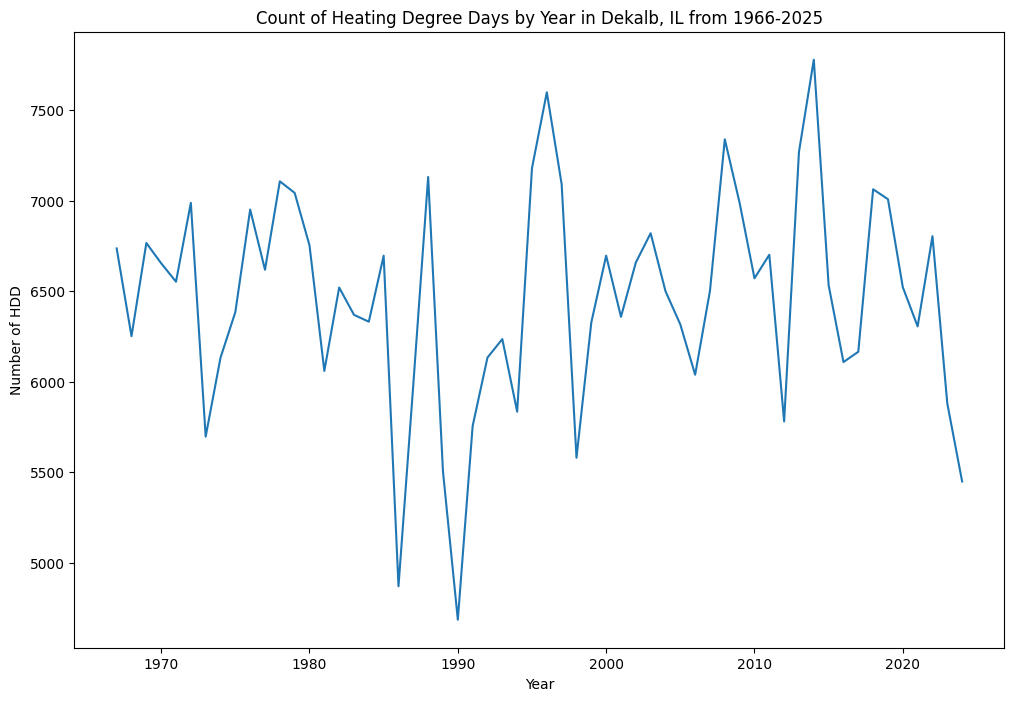

In [37]:
plt.figure(figsize=(12,8))
plt.plot(dkb_hdd['Year'], dkb_hdd['HDD'], label = 'Heating Degree Days (HDD) in Dekalb, IL')
plt.title('Count of Heating Degree Days by Year in Dekalb, IL from 1966-2025')
plt.ylabel('Number of HDD')
plt.xlabel('Year')

### Plot the CDD data in 

Text(0.5, 0, 'Year')

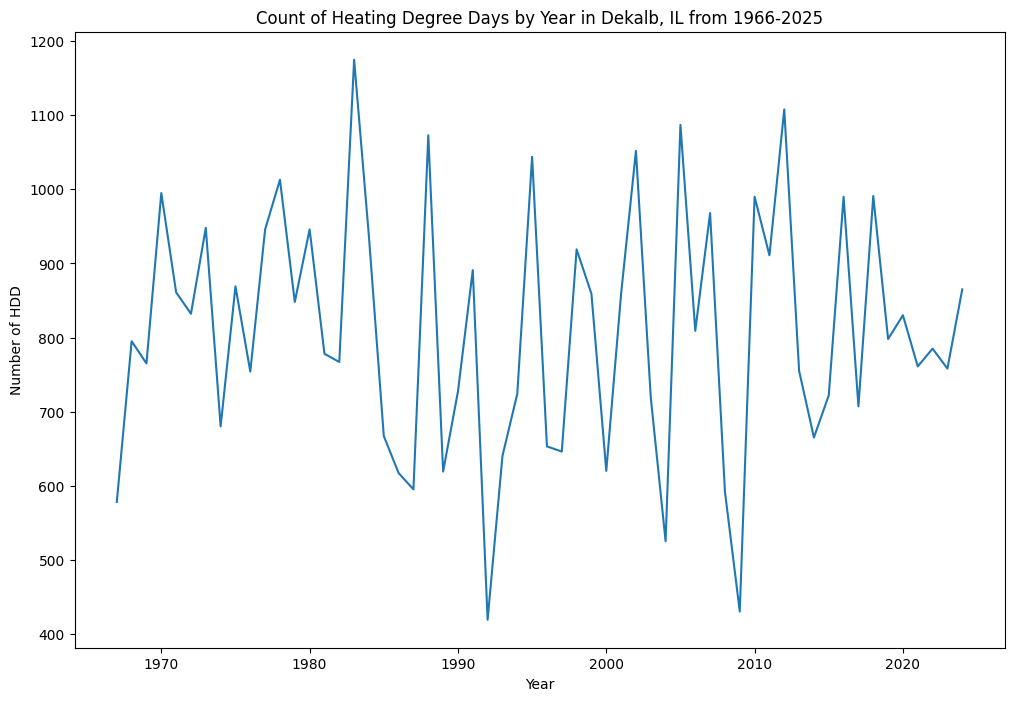

In [39]:
plt.figure(figsize=(12,8))
plt.plot(dkb_cdd['Year'], dkb_cdd['CDD'], label = 'Cooling Degree Days (CDD) in Dekalb, IL')
plt.title('Count of Heating Degree Days by Year in Dekalb, IL from 1966-2025')
plt.ylabel('Number of HDD')
plt.xlabel('Year')

### Calculate yearly mean HDD and CDD for Dekalb, IL using Pandas mean function

In [50]:
mean_hdd = dkb_hdd['HDD'].mean()
mean_cdd = dkb_cdd['CDD'].mean()


### Caluculate how each year's HDD and CDD deviated from the mean

In [58]:
dkb_hdd = dkb_hdd.copy()
dkb_hdd['HDD_Deviation'] = dkb_hdd['HDD'] - mean_hdd

dkb_cdd = dkb_cdd.copy()
dkb_cdd['CDD_Deviation'] = dkb_cdd['CDD'] - mean_cdd


### Plot the deviations from mean

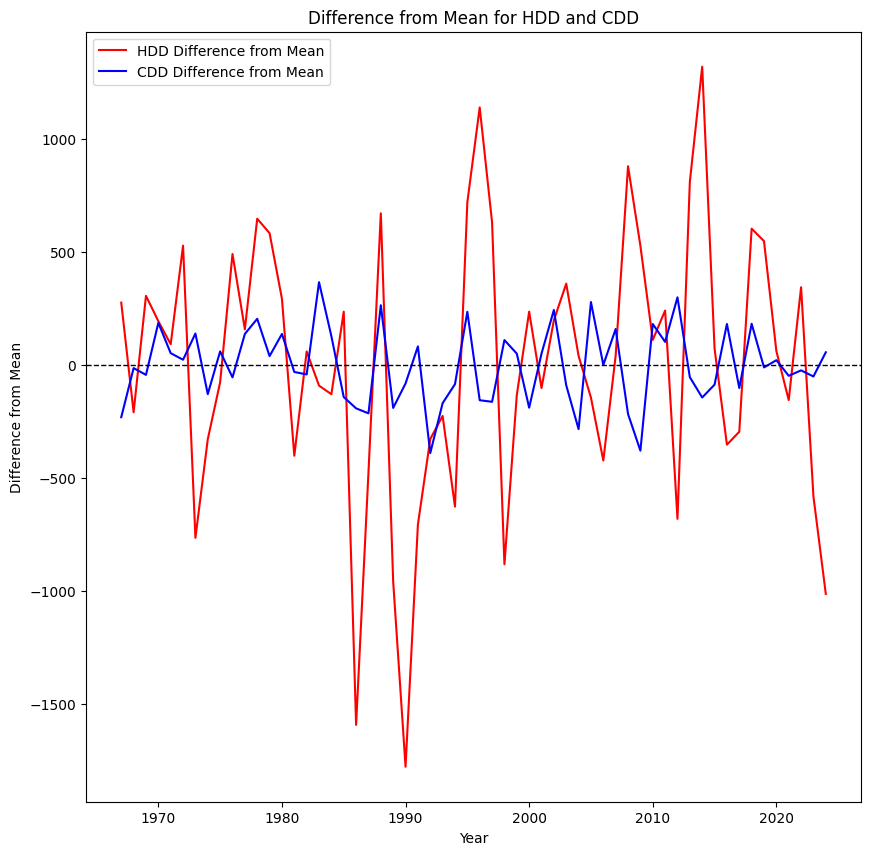

In [62]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(dkb_hdd['Year'], dkb_hdd['HDD_Deviation'], label='HDD Difference from Mean', color='red')
ax.plot(dkb_cdd['Year'], dkb_cdd['CDD_Deviation'], label='CDD Difference from Mean', color='blue')

ax.axhline(0, color='black', linewidth=1, linestyle='--')

ax.set_xlabel('Year')
ax.set_ylabel('Difference from Mean')
ax.set_title('Difference from Mean for HDD and CDD')
ax.legend()